In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
flight_nr = "17"

In [3]:
# Path templates for GPS and VO data
vo_data_template = "/mnt/hdd02/ba_copter_videos/Flight_{}/rotated_vo_path_{}.traj"
gps_data_path_template = "/mnt/hdd02/ba_copter_videos/Flight_{}/gps_{}_new.traj"

# Replace the flight number in the path templates
vo_data_path = vo_data_template.format(flight_nr, flight_nr)
gps_data_path = gps_data_path_template.format(flight_nr, flight_nr)

In [4]:
def calculate_velocity(df):
    velocities = []
    for i in range(1, len(df)):
        t1, x1, y1, z1, q1, q2, q3, q4 = df.iloc[i-1]
        t2, x2, y2, z2, q5, q6, q7, q8 = df.iloc[i]
        dt = t2 - t1
        if dt == 0:
            continue
        vx = (x2 - x1) / dt
        vy = (y2 - y1) / dt
        vz = (z2 - z1) / dt
        velocities.append((t2, vx, vy, vz))
    return velocities

In [5]:
def calculate_ate(velocities1, velocities2):
    ates = []
    for (t1, vx1, vy1, vz1), (t2, vx2, vy2, vz2) in zip(velocities1, velocities2):
        if t1 != t2:
            continue
        ate = np.sqrt((vx1 - vx2)**2 + (vy1 - vy2)**2 + (vz1 - vz2)**2)
        ates.append((t1, ate))
    return ates

In [6]:
def plot_trajectories_with_ate(df, ates):
    # Only plot the points that have corresponding ATE values
    x = df.iloc[:len(ates), 1]
    y = df.iloc[:len(ates), 2]
    ate_values = [ate[1] for ate in ates]

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x, y, c=ate_values, cmap='viridis')
    plt.colorbar(scatter, label='ATE')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Trajectory with ATE Color Coding')
    plt.show()

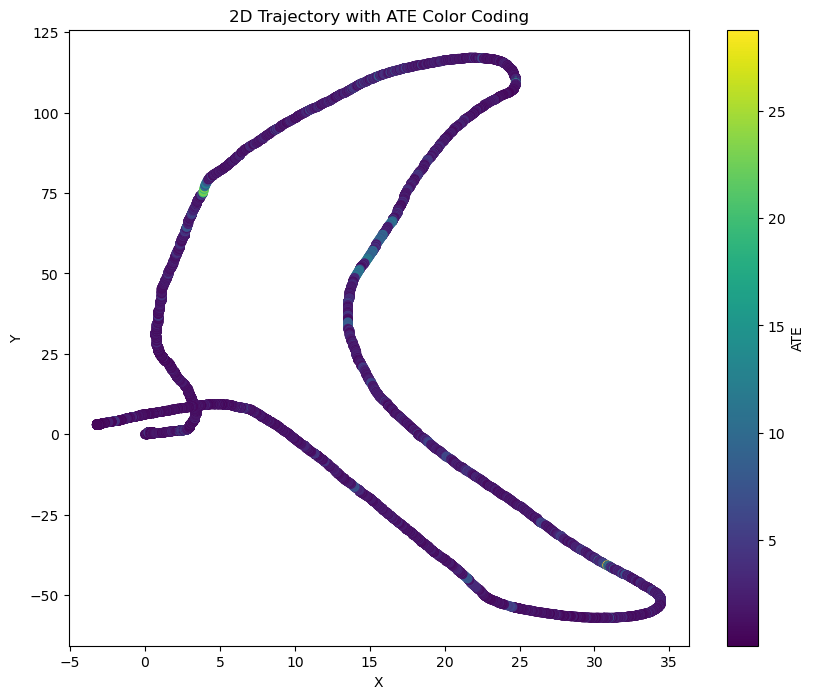

In [7]:
# CSV-Dateien laden
gps_data = pd.read_csv(gps_data_path, header=None)
vo_data = pd.read_csv(vo_data_path, header=None)

# Geschwindigkeiten berechnen
velocities_gps = calculate_velocity(gps_data)
velocities_vo = calculate_velocity(vo_data)

# ATE berechnen
ates = calculate_ate(velocities_gps, velocities_vo)

# Plot erstellen
plot_trajectories_with_ate(gps_data, ates)